In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from itertools import combinations, chain
from collections import Counter
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
teraz = datetime.now()

In [4]:
df = pd.read_csv("https://academic.udayton.edu/kissock/http/weather/gsod95-current/HUBUDPST.txt", names=["Month", "Day","Year","Temperature"], delim_whitespace=True, engine = 'python')

In [5]:
wynikiBU = df.tail(360)

In [6]:
df3 = pd.DataFrame(wynikiBU)
df3.head()

,Month,Day,Year,Temperature
8906,5,20,2019,62.1
8907,5,21,2019,61.3
8908,5,22,2019,58.6
8909,5,23,2019,57.6
8910,5,24,2019,59.4


In [7]:
df3['Full Date'] = df3['Day'].map(str) + '.' + df3['Month'].map(str) + '.' + df3['Year'].map(str)
df3['Day Month'] = df3['Day'].map(str) + '.' + df3['Month'].map(str)

In [8]:
df3.head()

,Month,Day,Year,Temperature,Full Date,Day Month
8906,5,20,2019,62.1,20.5.2019,20.5
8907,5,21,2019,61.3,21.5.2019,21.5
8908,5,22,2019,58.6,22.5.2019,22.5
8909,5,23,2019,57.6,23.5.2019,23.5
8910,5,24,2019,59.4,24.5.2019,24.5


In [9]:
df3 = df3.drop(columns = ["Month","Day","Year"])
df3.head()

,Temperature,Full Date,Day Month
8906,62.1,20.5.2019,20.5
8907,61.3,21.5.2019,21.5
8908,58.6,22.5.2019,22.5
8909,57.6,23.5.2019,23.5
8910,59.4,24.5.2019,24.5


In [10]:
df4 = df3.values.tolist()
df4[0]

[62.1, '20.5.2019', '20.5']

In [11]:
df4[0][0]

62.1

In [12]:
import copy
df5 = copy.deepcopy(df4)
df5[0][0]

62.1

In [13]:
for i in range(0,360):
    df5[i][0] = round((df4[i][0] - 32) * (5/9), 2)
df5[0][0]

16.72

In [14]:
x = []
for i in range(0,360):
    x.append(df5[i][2])
y = []
for i in range(0,360):
    y.append(df5[i][0])

In [15]:
df = pd.read_csv("https://academic.udayton.edu/kissock/http/weather/gsod95-current/IYROME.txt", names=["Month", "Day","Year","Temperature"], delim_whitespace=True, engine = 'python')
wynikiRO = df.tail(360)
df6 = pd.DataFrame(wynikiRO)
df6.head()

,Month,Day,Year,Temperature
8906,5,20,2019,59.6
8907,5,21,2019,62.1
8908,5,22,2019,62.5
8909,5,23,2019,61.8
8910,5,24,2019,62.0


In [16]:
df6['Full Date'] = df6['Day'].map(str) + '.' + df6['Month'].map(str) + '.' + df6['Year'].map(str)
df6['Day Month'] = df6['Day'].map(str) + '.' + df6['Month'].map(str)
df6 = df6.drop(columns = ["Month","Day","Year"])
df7 = df6.values.tolist()
df8 = copy.deepcopy(df7)
for i in range(0,360):
    df8[i][0] = round((df7[i][0] - 32) * (5/9), 2)
df8[0]

[15.33, '20.5.2019', '20.5']

In [17]:
df7[0]

[59.6, '20.5.2019', '20.5']

In [18]:
x1 = []
for i in range(0,360):
    x1.append(df8[i][2])
y1 = []
for i in range(0,360):
    y1.append(df8[i][0])

In [19]:
max1 = y[0] - y1[0]
d1 = 0
for i in range(1,360):
    if((y[i]-y1[i])>= max1):
        max1 = round(y[i] - y1[i],2)
        d1 = i

In [20]:
max2 = y1[0] - y[0]
d2 = 0
for i in range(1,360):
    if((y1[i]-y[i])>= max2):
        max2 = round(y1[i] - y[i],2)
        d2 = i

In [21]:
print(max1)
print(df8[d1][1])

4.27
13.6.2019


In [22]:
print(max2)
print(df8[d2][1])

15.61
2.12.2019


In [23]:
xx = []
for i in range(0,360,50):
    xx.append(x[i])

In [28]:
a = str(df7[d1][2]) + "  " + str(max1) + "°C"
a

'13.6  4.27°C'

In [29]:
a1 = str(df7[d2][2]) + "  " + str(max2) + "°C"
a1

'2.12  15.61°C'

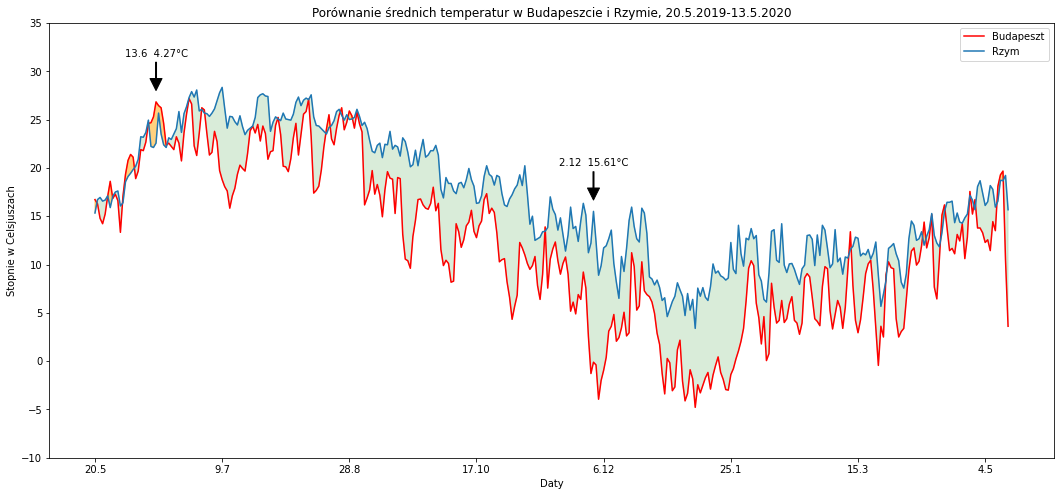

In [31]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot()

plt.plot(x,y, color = 'red', label = 'Budapeszt')
plt.plot(x,y1, label = 'Rzym')
# ax.set_xticks([x1[d1],x1[d2]])
ax.set_xticks(xx)
z = np.array(y)
z1 = np.array(y1)
plt.fill_between(x,y,y1,interpolate=True,color = 'g', alpha = 0.15, where=(z<=z1))
plt.fill_between(x,y,y1,interpolate=True,color = 'orange', alpha = 0.5, where=(z1<z))

plt.annotate(a, xy =(x[d1], y[d1] + 1),ha="center", va="center",
                xytext =(x[d1] , y[d1] + 5), 
                arrowprops = dict(facecolor ='black', width = 1,
                                  shrink = 0.05),)
plt.annotate(a1, xy =(x[d2], y1[d2] + 1),ha="center", va="center",
                xytext =(x[d2] , y1[d2] + 5), 
                arrowprops = dict(facecolor ='black', width = 1,
                                  shrink = 0.05),)
plt.legend()
plt.ylim(-10,35)
plt.xlabel("Daty")
plt.ylabel("Stopnie w Celsjuszach")
plt.title("Porównanie średnich temperatur w Budapeszcie i Rzymie, "  + df7[0][1] + "-" + df7[359][1])
plt.savefig('07_Tab_272348')
plt.show()